
# NY Taxi Rides
## Data Provided by the New York City Taxi and Limousine Commission.
Full dataset is 170 million taxi trips, 100GB of free space.  Our subset is 0.5% of all trips, about 850,000 rides.  

Download the dataset from Cyrille Rossant on GitHub:<br/>   https://github.com/ipython-books/minibook-2nd-data  

NYC Taxi & Limousine Commission [website](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page).  

Learn more about this case study in [Chapter 2](https://learning.oreilly.com/library/view/learning-ipython-for/9781783986989/ch02.html#ch02lvl2sec54) of the book *'Learning IPython for Interactive Computing and Data Visualization - Second Edition'* by Cyrille Rossant.  Published by Packt Publishing, 2015.  

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Load the data into the DataFrame object
Read the CSV (comma-separated) file and load the data.  
[pandas read_csv() documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)

In [8]:
data_filename = 'nyc_data.csv'

In [9]:
data = pd.read_csv(data_filename, 
                parse_dates=['pickup_datetime', 'dropoff_datetime'])

In [10]:
# see documentation string
pd.read_csv?

head() method of the DataFrame displays the first five rows.  
head(n) method returns the first n rows.  
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html

In [11]:
data.head()

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,76942C3205E17D7E7FE5A9F709D16434,25BA06A87905667AA1FE5990E33F0E2E,VTS,1,NaN,2013-01-01 00:00:00,2013-01-01 00:05:00,3,300,0.61,-73.955925,40.781887,-73.963181,40.777832
1,517C6B330DBB3F055D007B07512628B3,2C19FBEE1A6E05612EFE4C958C14BC7F,VTS,1,NaN,2013-01-01 00:05:00,2013-01-01 00:21:00,1,960,3.28,-74.005501,40.745735,-73.964943,40.755722
2,ED15611F168E41B33619C83D900FE266,754AEBD7C80DA17BA1D81D89FB6F4D1D,CMT,1,N,2013-01-01 00:05:52,2013-01-01 00:12:18,1,386,1.50,-73.969955,40.799770,-73.954567,40.787392
3,B33E704CC189E80C9671230C16527BBC,6789C77E1CBDC850C450D72204702976,VTS,1,NaN,2013-01-01 00:06:00,2013-01-01 00:06:00,6,0,0.00,-73.991432,40.755081,-73.991417,40.755085
4,BD5CC6A22D05EB2D5C8235526A2A4276,5E8F2C93B5220A922699FEBAFC2F7A54,VTS,1,NaN,2013-01-01 00:06:00,2013-01-01 00:12:00,2,360,1.31,-73.966225,40.773716,-73.955399,40.782597


In [12]:
data.describe()

,rate_code,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
count,846945.000000,846945.000000,8.469450e+05,8.469450e+05,846945.000000,846945.000000,846945.000000,846945.000000
mean,1.026123,1.710272,8.125239e+02,9.958211e+00,-73.975155,40.750490,-73.974197,40.750967
std,0.223480,1.375266,1.609831e+04,6.525205e+03,0.035142,0.027224,0.033453,0.030766
min,0.000000,0.000000,-1.000000e+01,0.000000e+00,-74.098305,40.009911,-74.099998,40.009911
25%,1.000000,1.000000,3.610000e+02,1.050000e+00,-73.992371,40.736031,-73.991570,40.735207
50%,1.000000,1.000000,6.000000e+02,1.800000e+00,-73.982094,40.752975,-73.980614,40.753597
75%,1.000000,2.000000,9.600000e+02,3.200000e+00,-73.968048,40.767460,-73.965157,40.768227
max,6.000000,6.000000,4.294796e+06,6.005123e+06,-73.028473,40.996132,-73.027061,40.998592


### Get the actual coordinates: two DataFrame columns
The following two variables are both Series objects.  a Series is a one-dimensional ndarray with axis labels.

In [13]:
p_lat = data['pickup_latitude']
p_lng = data.pickup_longitude

In [14]:
# returns the first 5 rows
p_lng.head()

0   -73.955925
1   -74.005501
2   -73.969955
3   -73.991432
4   -73.966225
Name: pickup_longitude, dtype: float64

In [15]:
# Get the coordinates of points in pixels from geographical coordinates.
def lat_lng_to_pixels(lat, lng):
    lat_rad = lat * np.pi / 180.0
    lat_rad = np.log(np.tan((lat_rad + np.pi / 2.0) / 2.0))
    x = 100 * (lng + 180.0) / 360.0
    y = 100 * (lat_rad - np.pi) / (2.0 * np.pi)
    return (x, y)

In [16]:
# Get pickup coordinates from pickup latitude and longitude
px, py = lat_lng_to_pixels(p_lat, p_lng)
#py.head()
type(py)

pandas.core.series.Series

### Display a scatter plot of pickup locations
Matplotlib scatter function makes a scatter plot of x vs y, where x and y are sequence like objects of the same length.  
Documentation:
http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter

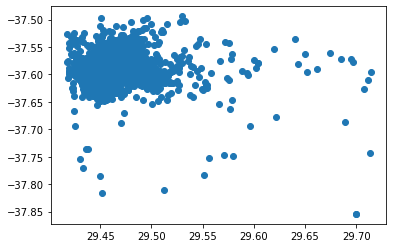

In [17]:
plt.scatter(px, py)

### Customize our plot:

plt or matplotlib.pyplot is a collection of command style functions. Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc. ... 

Set axis aspect ratio to equal (i.e. the ratio of y-unit to x-unit): https://matplotlib.org/stable/gallery/subplots_axes_and_figures/axis_equal_demo.html

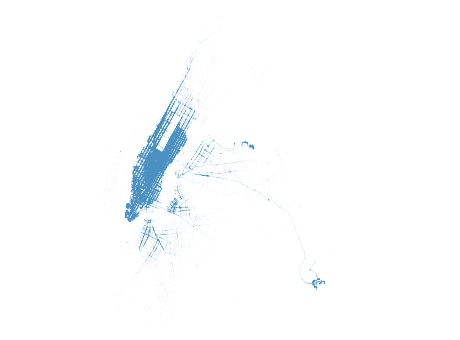

In [36]:
# Specify the figure size - make it bigger
plt.figure(figsize=(8, 6))

# equal aspect ratio
plt.axis('equal')

# zoom in around Manhattan
plt.xlim(29.40, 29.55)
plt.ylim(-37.63, -37.54)

# remove the axes
plt.axis('off')

# s argument is used to make the marker size smaller
# alpha specifies opacity
plt.scatter(px, py, s=.1, alpha=.03)

## Display a histogram of the trip distances.
[What is a histogram?](https://statistics.laerd.com/statistical-guides/understanding-histograms.php)  

[numpy linspace(start, stop, num)](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html) returns evenly spaced numbers over a specified interval: start - interval start; stop - interval stop; num - number of elements.  

In [19]:
bin_array = np.linspace(start=0., stop=10., num=100)
bin_array

array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
        2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
        3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
        3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
        4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
        4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
        5.05050505,  5.15151515,  5.25252525,  5.35353535,  5.45454545,
        5.55555556,  5.65656566,  5.75757576,  5.85858586,  5.95959596,
        6.06060606,  6.16161616,  6.26262626,  6.36363636,  6.46464646,
        6.56565657,  6.66666667,  6.76767677,  6.86868687,  6.96


[pandas.Series.hist()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.hist.html) draws histogram of the input Series using Matplotlib.  

<AxesSubplot:>

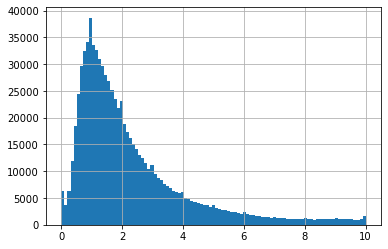

In [20]:
data.trip_distance.hist(bins=bin_array)

## Filtering with boolean indexing

### Select long rides

In [21]:
data.trip_distance.head()

0    0.61
1    3.28
2    1.50
3    0.00
4    1.31
Name: trip_distance, dtype: float64

In [22]:
(data.trip_distance > 100).head()

0    False
1    False
2    False
3    False
4    False
Name: trip_distance, dtype: bool

*loc* here selects single row or subset of rows from the DataFrame.  
100 miles is the distance from NY to Philadelphia

More about DataFrame *loc* property:  
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html

In [38]:
data.loc[data.trip_distance > 100]

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
504497,7237EC7ABD6114EDDC87A3AA846F8418,D52502537E2DF62C9BFFECF5A387E7E9,CMT,1,N,2013-08-02 11:22:31,2013-08-02 11:33:03,1,631,6005123.0,-73.997467,40.736397,-73.991882,40.764629
507107,50DA72F510E2F84A42712E13744FAC7B,EA9D03A766C1D32A6668FFF0C1EB4E4B,CMT,1,N,2013-08-04 18:42:17,2013-08-04 20:37:19,3,4290965,181.8,-73.978020,40.765167,-73.815041,40.730076
548988,A978A0AAE9B2CFEE310FACD97A09C319,CE56A27F53ABF411094B6CD708BFBA96,CMT,1,N,2013-08-24 17:03:27,2013-08-24 17:03:29,1,1,442.0,-73.993896,40.702644,-73.993874,40.702637
558665,5A5C516A820FE476E9D3E14101B669AC,C24585AA866FC76A4E09A05F55DC7E54,CMT,2,N,2013-08-29 10:01:40,2013-08-29 11:52:20,1,6640,164.4,-73.791534,40.661026,-73.983734,40.765778


### <i>interact</i> widget
https://github.com/ipython/ipywidgets/blob/9eb5f318a21ba8c918f20074af6d9c039ccadee0/docs/source/examples/Using%20Interact.ipynb  
  
Slider value runs from 0 to 200 - trip distance.  
  
  
show_nrows() function returns a number of trips where the trip distance is larger than the current slider value.  
  
***interact*** is a decorator that autogenerates UI controls (a slider) for function arguments, and then calls the function with those arguments when you manipulate the controls interactively. 

In [41]:
from ipywidgets import interact
#@interact is a decorator to create a widget.
@interact
def show_nrows(distance_threshold=(0, 200)):
    return len(data.loc[data.trip_distance > distance_threshold])

interactive(children=(IntSlider(value=100, description='distance_threshold', max=200), Output()), _dom_classes…